<a href="https://colab.research.google.com/github/ShaoFuLiu/tSDRG_DataAnalysis/blob/master/TestSortingData_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tSDRG Data Analysis** (Read me first)

### 1. **Before start plotting, please change the file path "my_metadata_file = ..." to your own metadata directory.**
### &emsp;*By defalt is for dropbox path.*
### 2. **Dim / Jdis = Dimerization / Randomness strength** 

### 3. **DimABC / JdisABC = Dimerization A.BC / Randomness strength A.BC**
### &emsp;*example: Dim123 = Dimerization 1.23*

# **Define metadata directory path**

In [1]:
## ------------------------------------------ Please change blow path to your own metadata directory path ------------------------------------------
my_metadata_file = '../tSDRG_metadata/Spin2/metadata/' ## Your local path (not necessary)
# my_metadata_file = './Spin2_metadata/' ## Defalt (Dropbox path)

# **Import lib and set basic parameter**

In [2]:
## Import library
import os
import math
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [3]:
## Basic parameter
cnames = {                        
'blueviolet':           '#8A2BE2',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkorange':           '#FF8C00',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'gold':                 '#FFD700',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():                          ## color array
    carr.append(cmap)
marr = ['o-', '^-', 'x-', 's-', 'p-', '*-', 'h-']   ## marker array
marr_nl = ['o', '^', 'x', 's', 'p', '*', 'h']       ## marker array (no line)

spin = int(2)                                       ## Spin type
BC = 'PBC'                                          ## Boundary condition
P = 10                                              ## Random distribution type (10 == Exponential distribution)
M = 40                                              ## Bound dimension 
font_size = 30

ALL_Dimer = ["Dim000"]
ALL_Jdis = ["Jdis000"]

Ddiff = 1
init_D = 0      ## Dim000 = 0.00
final_D = 100   ## Dim100 = 1.00
ds = (final_D - init_D)/Ddiff-1
for i in range (int(ds)+1):
    strD = "Dim00" + str((i+1)*Ddiff+init_D)
    if ((i+1)*Ddiff+init_D >= 10):
        strD = "Dim0" + str((i+1)*Ddiff+init_D)
    if ((i+1)*Ddiff+init_D >= 100):
        strD = "Dim" + str((i+1)*Ddiff+init_D) 
    ALL_Dimer.append(strD)

Jdiff = 1
init_J = 0      ## Jdis000 = 0.00
final_J = 600   ## Jdis600 = 6.00
js = (final_J - init_J)/Jdiff-1
for i in range (int(js)+1):
    strJ = "Jdis00" + str((i+1)*Jdiff+init_J)
    if ((i+1)*Jdiff+init_J >= 10):
        strJ = "Jdis0" + str((i+1)*Jdiff+init_J)
    if ((i+1)*Jdiff+init_J >= 100):
        strJ = "Jdis" + str((i+1)*Jdiff+init_J)
    ALL_Jdis.append(strJ)
# print(ALL_Dimer) ## ALL_Dimer = [Dim000, Dim001, ... , Dim099, Dim100]
# print(ALL_Jdis)  ## ALL_Jdis = [Jdis000, Jdis001, ... , Jdis599, Jdis600]

# **Define function**

In [6]:
def find_id(f_diff): ## find crossing point index
    ids = []
    for id in range(len(f_diff)-1):
        if (np.sign(f_diff['diff'][id]) != np.sign(f_diff['diff'][id+1])):
            ids.append(id)
    if (len(ids) == 0):
        raise ValueError('no crossing point')
    return ids

def fitting_point(f_L1, f_L2, ids, var, para, n_point):
    x = []
    y = []
    for id in ids:   
        id_range = range(id-int(n_point/2-1), id+int(n_point/2)) ## use n point to fit (id-(n/2-1), ... id, ..., id+(n/2))

        a1, b1  = np.polyfit(f_L1[var][id_range], f_L1[para][id_range], 1)
        a2, b2  = np.polyfit(f_L2[var][id_range], f_L2[para][id_range], 1)
        x0 = (b2-b1)/(a1-a2)
        y0 = a1*x0 + b1
        x.append(x0)
        y.append(y0)
    return x,y

def fitting_point_slope(f_L1, f_L2, ids, var, para, n_point): ## return L1, L2 slope
    for id in ids:   
        id_range = range(id-int(n_point/2-1), id+int(n_point/2)) ## use n point to fit (id-(n/2-1), ... id, ..., id+(n/2))

        a1, b1  = np.polyfit(f_L1[var][id_range], f_L1[para][id_range], 1)
        a2, b2  = np.polyfit(f_L2[var][id_range], f_L2[para][id_range], 1)
    return a1,a2

# **Plot**

## D(crossing point) v.s. 1/L

[0.6239325887604336, 0.5767881971547851, 0.5447808310505975, 0.53219168774069, 0.5204068598077265, 0.4979858037626365, 0.5046191645591308, 0.48134393819286275, 0.5116965561682149, 0.4756378236942908, 0.477541341656829, 0.4696688134394394]
0.45427157506598664


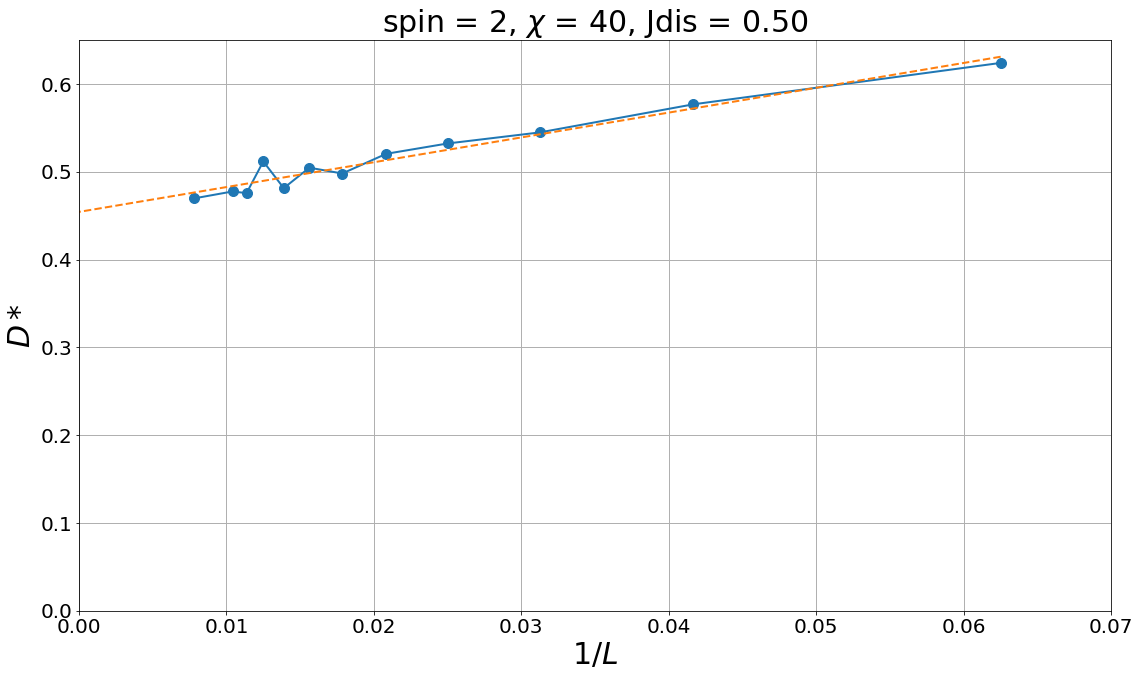

In [25]:
OrderPara = "ZL"

if (OrderPara == "SOP"):
    Para = "O^z"
    plt.ylabel(r'$O^z(r=L/2)$_diff', fontsize=font_size)
if (OrderPara == "ZL"):
    Para = "ZL"
    plt.ylabel(r'$ZL$_diff', fontsize=font_size)

Ls = [16,24,32,40,48,56,64,72,80,88,96,128,256]
# Ls = [16,32,48,64]
# Jdis = ["Jdis010","Jdis020","Jdis030","Jdis040","Jdis050","Jdis060"]
Jdis = ["Jdis050"]
Dimer = ALL_Dimer[20:66]
n_point = 4

for j in range(len(Jdis)):
    jdis = Jdis[j]
    J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
    D1 = []
    D2 = []

    for l in range(len(Ls)-1):
        L1 = Ls[l]
        L2 = Ls[l+1]
        f_L1 = pd.DataFrame(columns = ['Dimer', 'ZL'])
        f_L2 = pd.DataFrame(columns = ['Dimer', 'ZL'])
        f_diff = pd.DataFrame(columns = ['Dimer', 'diff'])
        ignore_num = 0

        for d in range(len(Dimer)):
            dimer = Dimer[d]
            D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])
        
            file_L1 = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L1) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'
            file_L2 = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L2) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'
            
            if (os.path.exists(file_L1) == False or os.path.exists(file_L2) == False): # Some data is not ok, so we need to ignore it.
                ignore_num += 1
                continue
        
            df_L1 = pd.read_csv(file_L1)
            df_L2 = pd.read_csv(file_L2)

            if (OrderPara == "SOP"):
                mean_L1 = {'Dimer':D, 'ZL':-df_L1[Para][0]}
                mean_L2 = {'Dimer':D, 'ZL':-df_L2[Para][0]}
                mean_diff = {'Dimer':D, 'diff':df_L1[Para][0]-df_L2[Para][0]}
            else:
                mean_L1 = {'Dimer':D, 'ZL':df_L1[Para][0]}
                mean_L2 = {'Dimer':D, 'ZL':df_L2[Para][0]}
                mean_diff = {'Dimer':D, 'diff':df_L2[Para][0]-df_L1[Para][0]}

            f_L1.loc[d-ignore_num] = mean_L1
            f_L2.loc[d-ignore_num] = mean_L2
            f_diff.loc[d-ignore_num] = mean_diff

        ids = find_id(f_diff)
        Ds, ys = fitting_point(f_L1, f_L2, ids, "Dimer", Para, n_point)
        D1.append(Ds[0])
        # D2.append(Ds[1])
        
print(D1)
x = []
for l in range(len(D1)):
    x.append(Ls[l]**-1)
    
plt.plot(x, D1, "o-", markersize = font_size/3, linewidth = font_size/15)
a, b  = np.polyfit(x, D1, 1)

fit_x = x.copy()
fit_x.append(0)
fit_y = [i * a + b for i in fit_x]
print(b)

plt.plot(fit_x, fit_y, "--", markersize = font_size/3, linewidth = font_size/15)
# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=font_size/1.5)
plt.yticks(fontsize=font_size/1.5)
plt.ylabel(r'$D*$', fontsize=font_size)
plt.xlabel(r'$1/L$', fontsize=font_size)
plt.xlim(0, 0.07)
plt.ylim(0, 0.65)
plt.grid(linestyle='-', linewidth=1)
plt.title('spin = %s, $\chi$ = %d, Jdis = %.2f' % (spin, M, J), fontsize=font_size)
# plt.legend(bbox_to_anchor=(1, 1), loc = 'best',fontsize=font_size*5/6)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

## Fix **<font color = green>D</font>**, look **<font color = yellow>J</font>**, Order Parameter v.s. **<font color = red>L</font>**$^{-\eta_{st}}$

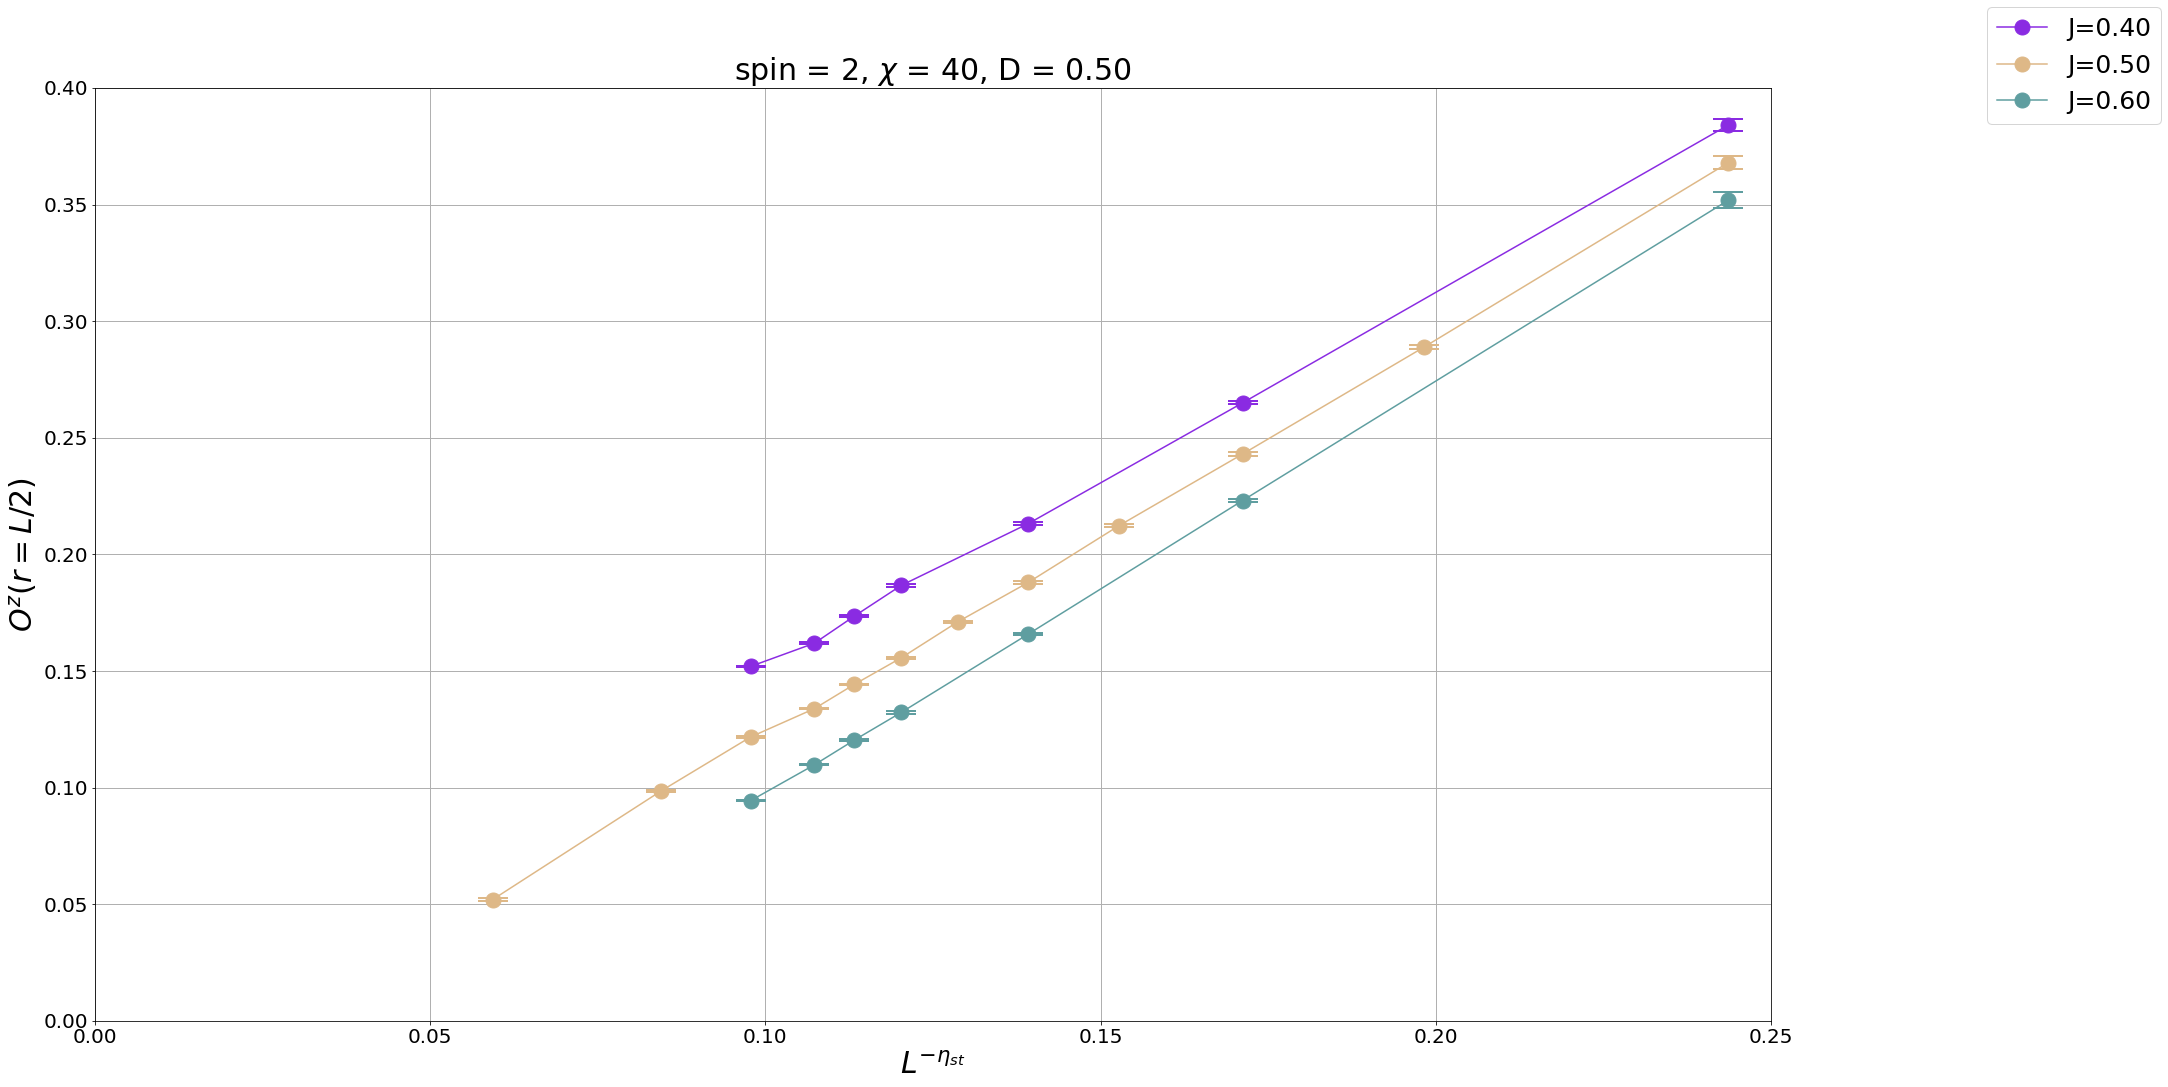

In [13]:
OrderPara = "SOP"  ## Choose SOP or ZL
Ls = [16,24,32,40,48,56,64,72,80,96,128,256]
Dimer = ["Dim050"]
Jdis = ["Jdis040","Jdis050","Jdis060",]
# Jdis = ["Jdis000"]
ita = 0.5093

if (OrderPara == "SOP"):
    Para = "O^z"
    # plt.ylabel(r'$O^z(r=L/2)$', fontsize=font_size)
    ylable = r'$O^z(r=L/2)$'
else:
    Para = "ZL"
    # plt.ylabel(r'$ZL$', fontsize=font_size)
    ylable = r'$ZL$'

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(30,15))
for d in range(len(Dimer)):
    dimer = Dimer[d]
    D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])
    
    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
        dfplt = pd.DataFrame(columns = ['L**-eta', Para, 'error'])     
        
        for l in range(len(Ls)):
            L = Ls[l]
             
            myfile = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'

            if (os.path.exists(myfile) == False): # Some data is not ok, so we need to ignore it.
                # print(dimer + ' does not exist!!!')
                continue
            
            df = pd.read_csv(myfile)

            if (OrderPara == "SOP" and spin == 2):
                mean = {'L**-eta':L**-ita, Para:-1*df[Para][0], 'error':df["error"][0]}
            else:
                mean = {'L**-eta':L**-ita, Para:df[Para][0], 'error':df["error"][0]}
            dfplt.loc[l] = mean

        plt.rcParams['figure.figsize'] = (15, 10)
        plt.plot(dfplt["L**-eta"], dfplt[Para], marr[int(j/6)], color=carr[j%6], markersize = 15, label = 'J=%.2f' %(J))
        plt.errorbar(dfplt["L**-eta"], dfplt[Para], yerr=dfplt['error'], linestyle='None', capsize=font_size/2, capthick=font_size/15, color=carr[j%6], label=None)
            
plt.xticks(fontsize=font_size/1.5)
plt.yticks(fontsize=font_size/1.5)
plt.xlabel(r'$L^{-\eta_{st}}$', fontsize=font_size)
plt.ylabel(ylable, fontsize=font_size)
plt.xlim(0,0.25)
plt.ylim(0, 0.40)
# plt.xscale('log')
# plt.yscale('log')
plt.grid(linestyle='-', linewidth=1)
plt.title('spin = %s, $\chi$ = %d, D = %.2f' % (spin, M, D), fontsize=font_size)
plt.legend(bbox_to_anchor=(1.24, 1.1), loc = 'best',fontsize=font_size*5/6)
# plt.savefig( dimer + '_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Jdis.pdf', format='pdf', dpi=4000)
# plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Jdis.pdf', format='pdf', dpi=4000)
plt.show()

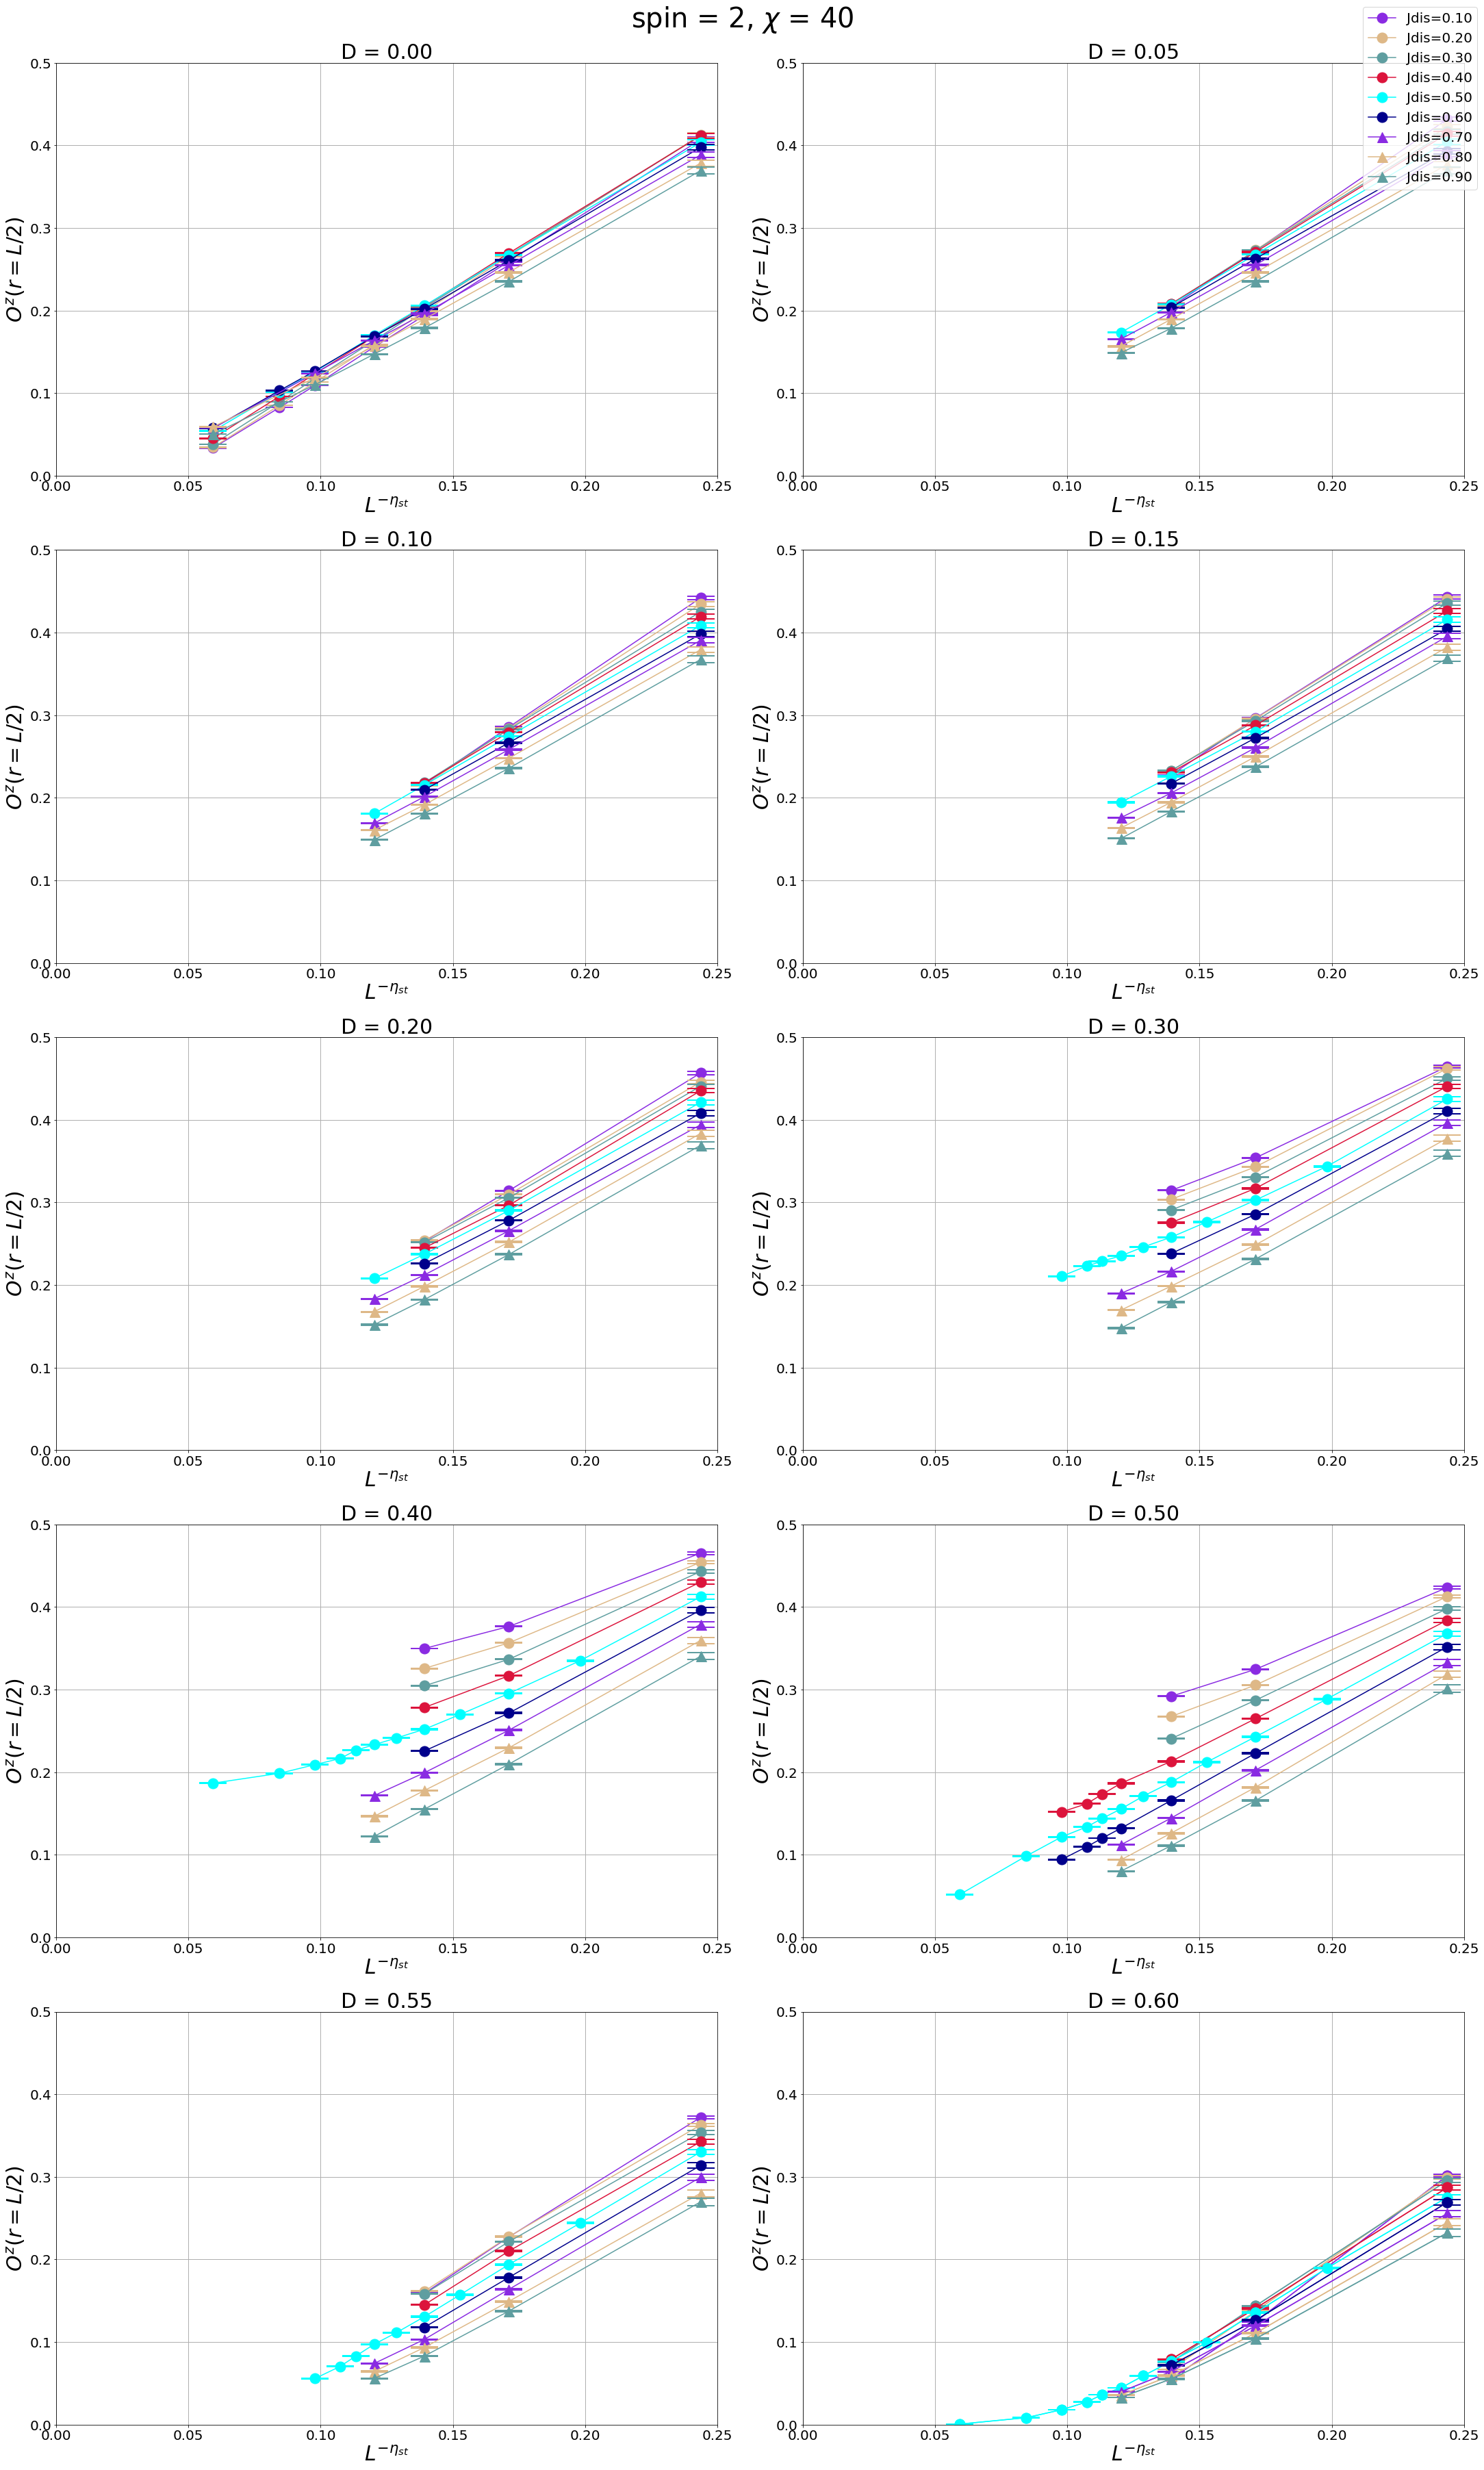

In [21]:
## Multiplot
OrderPara = "SOP"  ## Choose SOP or ZL
Ls = [16,24,32,40,48,56,64,72,80,96,128,256]
# Dimer = ["Dim000","Dim005","Dim010","Dim015","Dim020","Dim025","Dim030","Dim035","Dim040","Dim045","Dim050","Dim055","Dim060","Dim065","Dim070"]
Dimer = ["Dim000","Dim005","Dim010","Dim015","Dim020","Dim030","Dim040","Dim050","Dim055","Dim060"]
Jdis = ["Jdis010","Jdis020","Jdis030","Jdis040","Jdis050","Jdis060","Jdis070","Jdis080","Jdis090"]
# Jdis = ["Jdis000"]
eta = 0.5093

if (OrderPara == "SOP"):
    Para = "O^z"
    # plt.ylabel(r'$O^z(r=L/2)$', fontsize=font_size)
    ylable = r'$O^z(r=L/2)$'
else:
    Para = "ZL"
    # plt.ylabel(r'$ZL$', fontsize=font_size)
    ylable = r'$ZL$'

fig, ax = plt.subplots(5, 2, constrained_layout=True, figsize=(30,50))

for j in range(len(Jdis)):
    jdis = Jdis[j]
    J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])

    for d in range(len(Dimer)):
        dimer = Dimer[d]
        D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])
        dfplt = pd.DataFrame(columns = ['L**-eta', Para, 'error'])  

        for l in range(len(Ls)):
            L = Ls[l]
             
            myfile = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'

            if (os.path.exists(myfile) == False): # Some data is not ok, so we need to ignore it.
                # print(dimer + ' does not exist!!!')
                continue
            
            df = pd.read_csv(myfile)

            if (OrderPara == "SOP" and spin == 2):
                mean = {'L**-eta':L**-eta, Para:-1*df[Para][0], 'error':df["error"][0]}
            else:
                mean = {'L**-eta':L**-eta, Para:df[Para][0], 'error':df["error"][0]}
            dfplt.loc[l] = mean

        if (d == len(Dimer)-1):
            ax[int(d/2)][d-2*int(d/2)].plot(dfplt['L**-eta'], dfplt[Para], marr[int(j/6)], color=carr[j%6], markersize = 15, label = 'Jdis=%.2f' %(J))

        ax[int(d/2)][d-2*int(d/2)].plot(dfplt['L**-eta'], dfplt[Para], marr[int(j/6)], color=carr[j%6], markersize = 15)
        ax[int(d/2)][d-2*int(d/2)].errorbar(dfplt['L**-eta'], dfplt[Para], yerr=dfplt['error'], linestyle='None', capsize=20, capthick=2, color=carr[j%6], label=None)
        ax[int(d/2)][d-2*int(d/2)].set_xlabel(r'$L^{-\eta_{st}}$', fontsize=30)
        ax[int(d/2)][d-2*int(d/2)].set_ylabel(ylable, fontsize=30)
        ax[int(d/2)][d-2*int(d/2)].tick_params(axis='x', labelsize=20) 
        ax[int(d/2)][d-2*int(d/2)].tick_params(axis='y', labelsize=20)
        ax[int(d/2)][d-2*int(d/2)].set_title("D = %.2f" %(D), fontsize=30)
        ax[int(d/2)][d-2*int(d/2)].grid(linestyle='-', linewidth=1)
        ax[int(d/2)][d-2*int(d/2)].set_xlim([0,0.25])
        ax[int(d/2)][d-2*int(d/2)].set_ylim([0, 0.5])
        # ax[int(d/2)][d-2*int(d/2)].legend(loc = 'best',fontsize=font_size*5/6)

# plt.xscale('log')
# plt.yscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]            
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.suptitle('spin = %s, $\chi$ = %d' % (spin, M), fontsize=40)
fig.legend(lines, labels, fontsize=20)
# plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-D.pdf', format='pdf', dpi=4000)
plt.show()

## Fix **<font color = yellow>J</font>**, look **<font color = green>D</font>**, **Order Parameter** v.s. **<font color = red>L</font>**$^{-\eta_{st}}$

0.04476132500317411
0.03343920251157034
0.022955376887860274
0.011343988715100154
-0.0012731198990546717
-0.01758459766142162


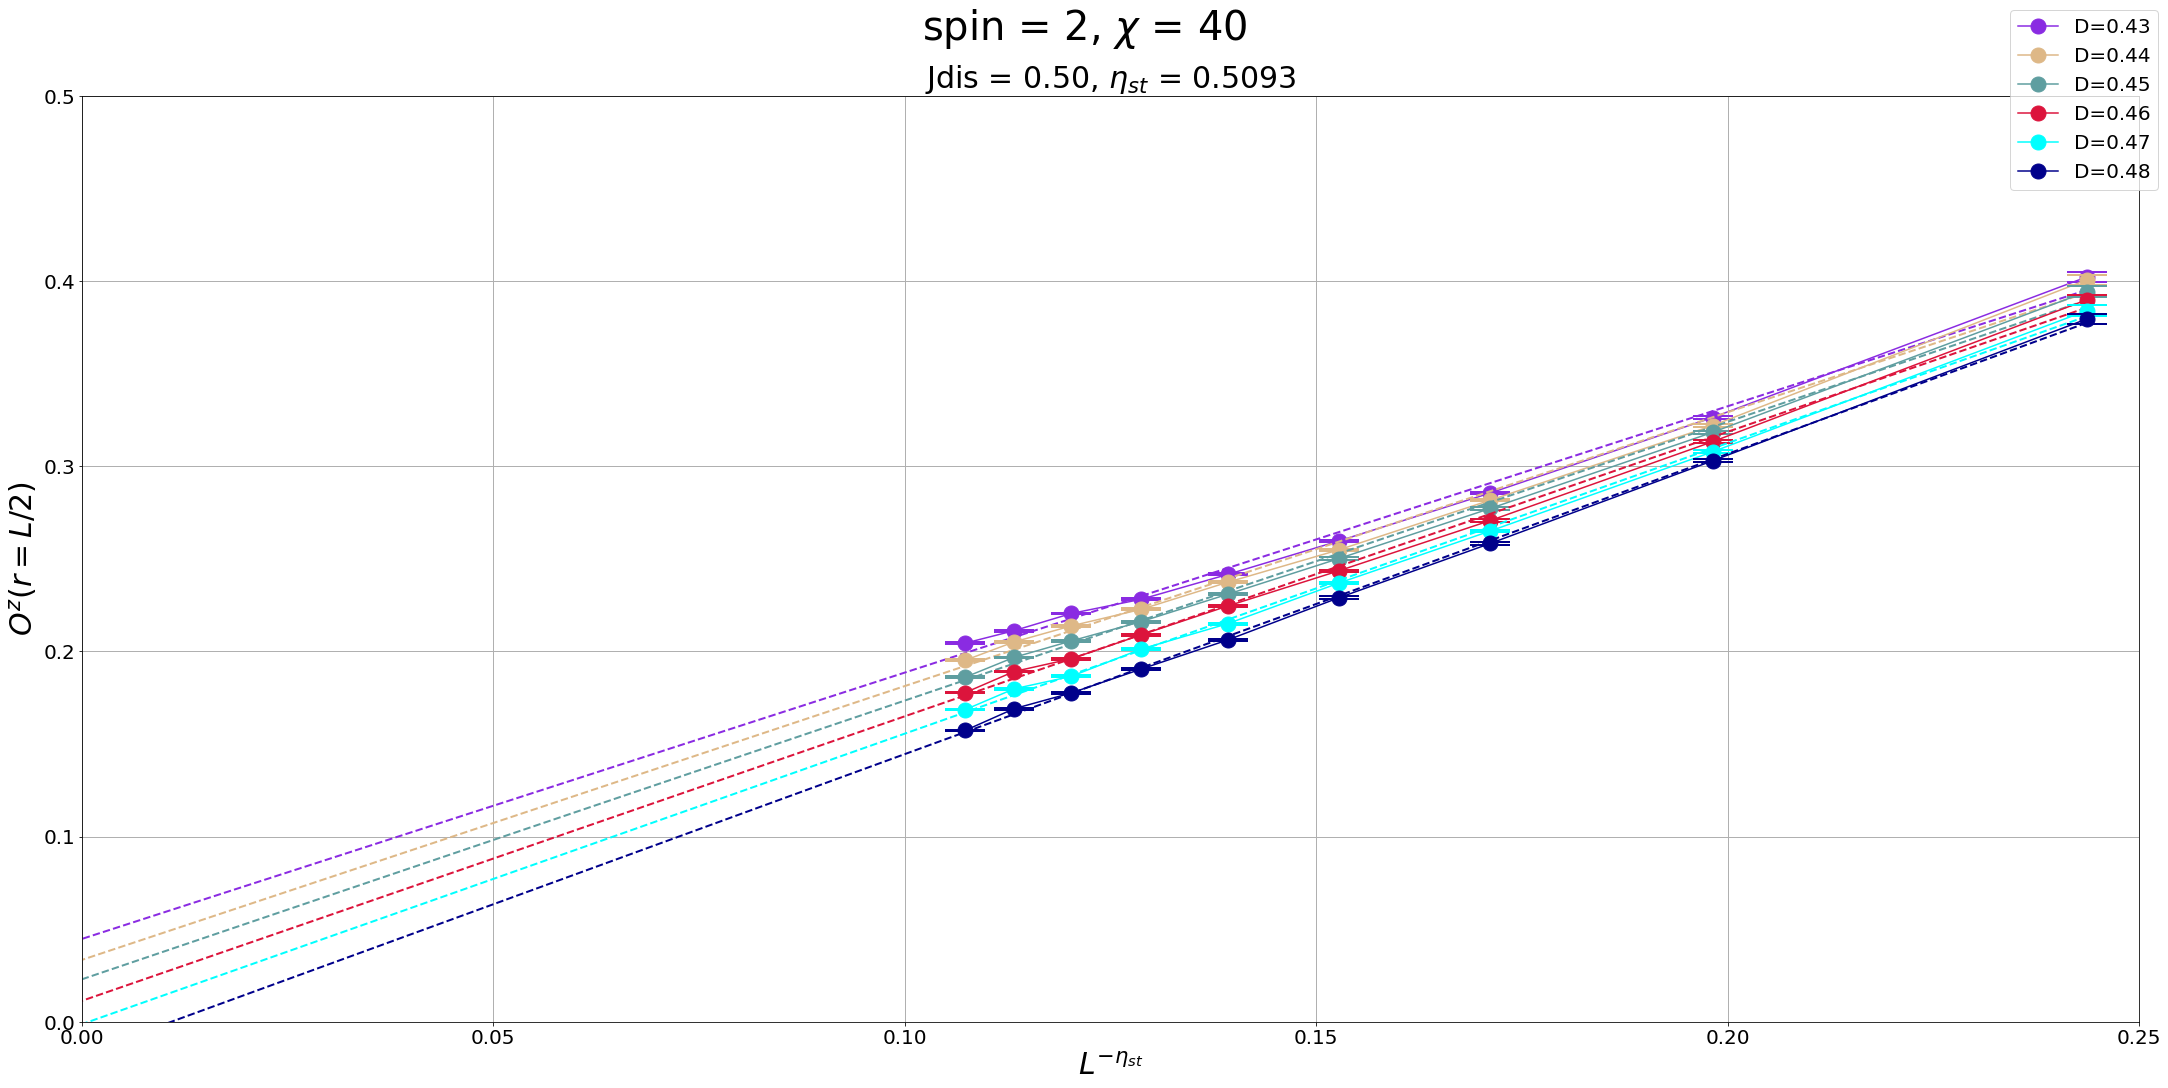

In [13]:
OrderPara = "SOP"  ## Choose SOP or ZL
Ls = [16,24,32,40,48,56,64,72,80]
Dimer = ["Dim043","Dim044","Dim045","Dim046","Dim047","Dim048"]
# Dimer = ["Dim000","Dim005","Dim010","Dim015","Dim020","Dim030","Dim040","Dim050","Dim055","Dim060","Dim065"]
Jdis = ["Jdis050"]
eta = 0.5093

if (OrderPara == "SOP"):
    Para = "O^z"
    # plt.ylabel(r'$O^z(r=L/2)$', fontsize=font_size)
    ylable = r'$O^z(r=L/2)$'
else:
    Para = "ZL"
    # plt.ylabel(r'$ZL$', fontsize=font_size)
    ylable = r'$ZL$'

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(30,15))

for d in range(len(Dimer)):
    dimer = Dimer[d]
    D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])

    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
        dfplt = pd.DataFrame(columns = ['L**-eta', Para, 'error'])  

        for l in range(len(Ls)):
            L = Ls[l]
             
            myfile = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'

            if (os.path.exists(myfile) == False): # Some data is not ok, so we need to ignore it.
                # print(dimer + ' does not exist!!!')
                continue
            
            df = pd.read_csv(myfile)

            if (OrderPara == "SOP" and spin == 2):
                mean = {'L**-eta':L**-eta, Para:-1*df[Para][0], 'error':df["error"][0]}
            else:
                mean = {'L**-eta':L**-eta, Para:df[Para][0], 'error':df["error"][0]}
            dfplt.loc[l] = mean

        if (dfplt.empty):
            continue

        a, b  = np.polyfit(dfplt['L**-eta'], dfplt[Para], 1)
        print(b)
        fit_x = dfplt['L**-eta'].copy()
        fit_x.loc[fit_x.index.max()+1] = 0
        fit_y = [i * a + b for i in fit_x]
        ax.plot(fit_x, fit_y, "--", markersize = font_size/3, color=carr[d%6], linewidth = font_size/15)

        ax.plot(dfplt['L**-eta'], dfplt[Para], marr[int(d/6)], color=carr[d%6], markersize = 15, label = 'D=%.2f' %(D))
        ax.errorbar(dfplt['L**-eta'], dfplt[Para], yerr=dfplt['error'], linestyle='None', capsize=20, capthick=2, color=carr[d%6], label=None)
        ax.set_xlabel(r'$L^{-\eta_{st}}$', fontsize=30)
        ax.set_ylabel(ylable, fontsize=30)
        ax.tick_params(axis='x', labelsize=20) 
        ax.tick_params(axis='y', labelsize=20)
        ax.set_title(r"Jdis = %.2f, $\eta_{st}$ = %.4f" %(J, eta), fontsize=30)
        ax.grid(linestyle='-', linewidth=1)
        ax.set_xlim([0,0.25])
        ax.set_ylim([0, 0.5])
        # ax.legend(loc = 'best',fontsize=font_size*5/6)

# plt.xscale('log')
# plt.yscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]            
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.suptitle('spin = %s, $\chi$ = %d' % (spin, M), fontsize=40)
fig.legend(lines, labels, fontsize=20)
# plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-D.pdf', format='pdf', dpi=4000)
plt.show()   

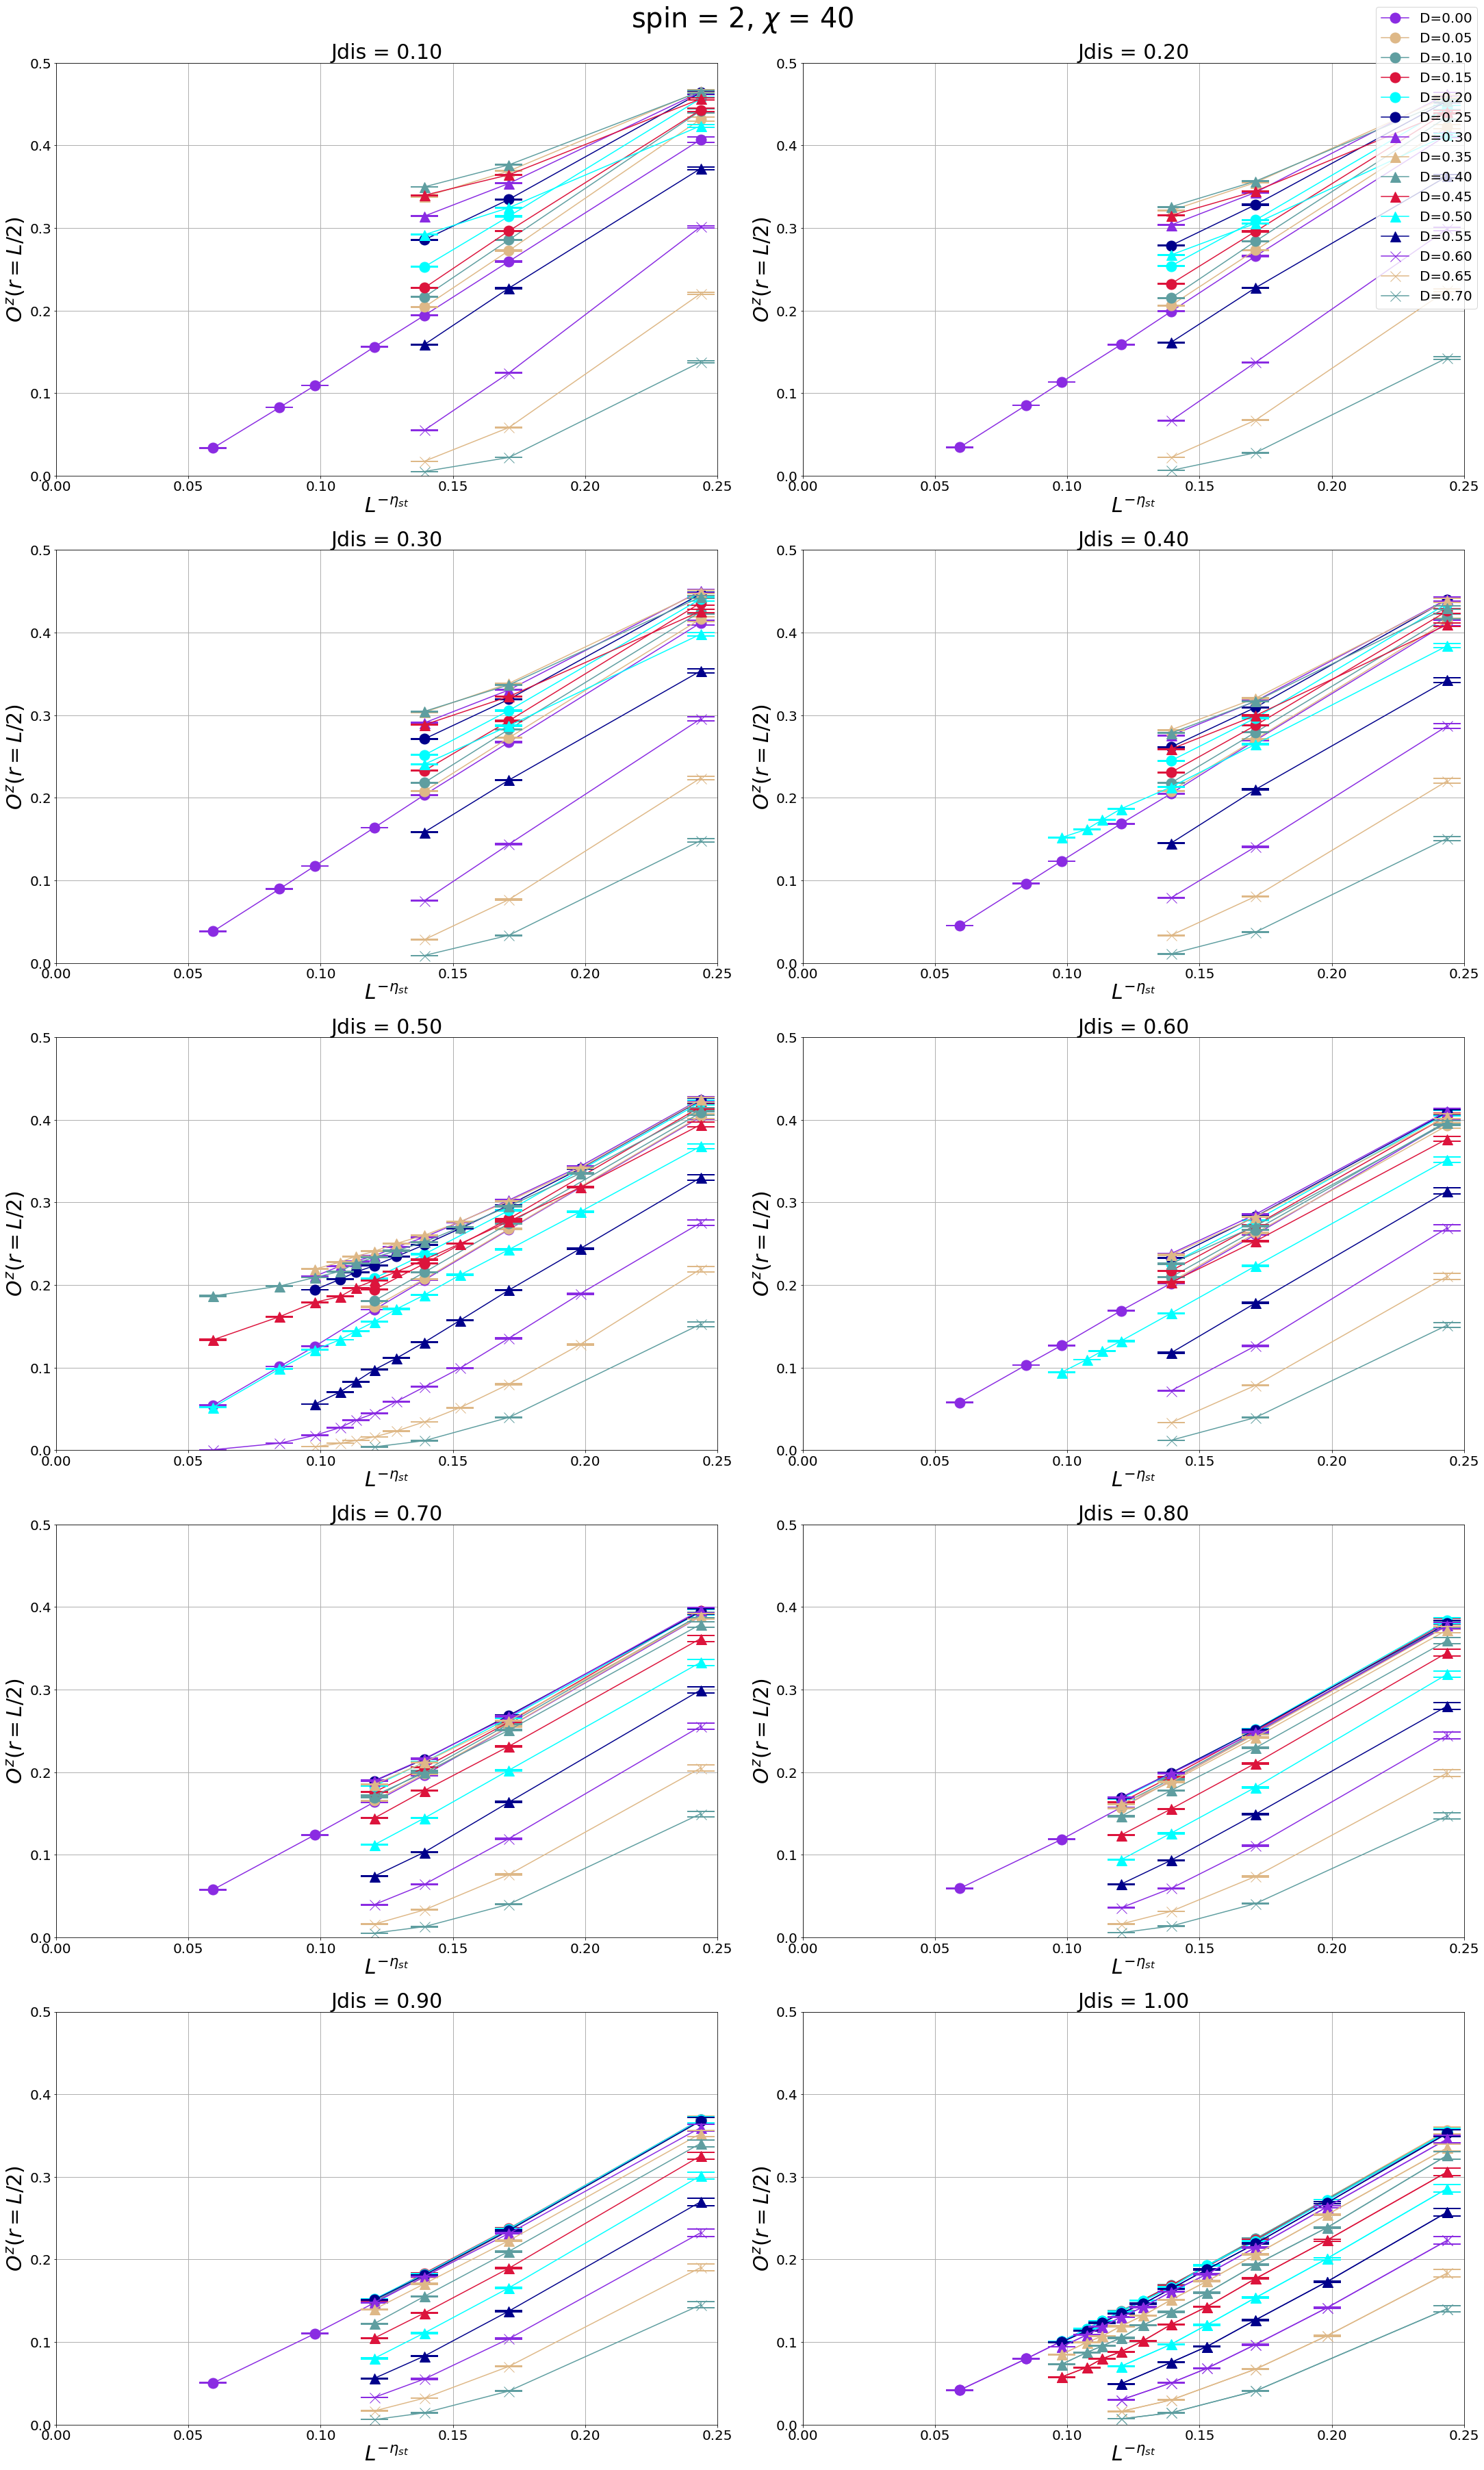

In [37]:
## Multiplot
OrderPara = "SOP"  ## Choose SOP or ZL
Ls = [16,24,32,40,48,56,64,72,80,96,128,256]
# Dimer = ["Dim000","Dim005","Dim010","Dim015","Dim020","Dim025","Dim030","Dim035","Dim040","Dim045","Dim050","Dim055","Dim060","Dim065","Dim070"]
Dimer = ["Dim000","Dim005","Dim010","Dim015","Dim020","Dim025","Dim030","Dim035","Dim040","Dim045","Dim050","Dim055","Dim060","Dim065","Dim070"]
Jdis = ["Jdis010","Jdis020","Jdis030","Jdis040","Jdis050","Jdis060","Jdis070","Jdis080","Jdis090","Jdis100"]
# Jdis = ["Jdis000"]
eta = 0.5093

if (OrderPara == "SOP"):
    Para = "O^z"
    # plt.ylabel(r'$O^z(r=L/2)$', fontsize=font_size)
    ylable = r'$O^z(r=L/2)$'
else:
    Para = "ZL"
    # plt.ylabel(r'$ZL$', fontsize=font_size)
    ylable = r'$ZL$'

fig, ax = plt.subplots(5, 2, constrained_layout=True, figsize=(30,50))

for d in range(len(Dimer)):
    dimer = Dimer[d]
    D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])

    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
        dfplt = pd.DataFrame(columns = ['L**-eta', Para, 'error'])  

        for l in range(len(Ls)):
            L = Ls[l]
             
            myfile = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'

            if (os.path.exists(myfile) == False): # Some data is not ok, so we need to ignore it.
                # print(dimer + ' does not exist!!!')
                continue
            
            df = pd.read_csv(myfile)

            if (OrderPara == "SOP"):
                mean = {'L**-eta':L**-eta, Para:-1*df[Para][0], 'error':df["error"][0]}
            else:
                mean = {'L**-eta':L**-eta, Para:df[Para][0], 'error':df["error"][0]}
            dfplt.loc[l] = mean

        if (j == len(Jdis)-1):
            ax[int(j/2)][j-2*int(j/2)].plot(dfplt['L**-eta'], dfplt[Para], marr[int(d/6)], color=carr[d%6], markersize = 15, label = 'D=%.2f' %(D))

        ax[int(j/2)][j-2*int(j/2)].plot(dfplt['L**-eta'], dfplt[Para], marr[int(d/6)], color=carr[d%6], markersize = 15)
        ax[int(j/2)][j-2*int(j/2)].errorbar(dfplt['L**-eta'], dfplt[Para], yerr=dfplt['error'], linestyle='None', capsize=20, capthick=2, color=carr[d%6], label=None)
        ax[int(j/2)][j-2*int(j/2)].set_xlabel(r'$L^{-\eta_{st}}$', fontsize=30)
        ax[int(j/2)][j-2*int(j/2)].set_ylabel(ylable, fontsize=30)
        ax[int(j/2)][j-2*int(j/2)].tick_params(axis='x', labelsize=20) 
        ax[int(j/2)][j-2*int(j/2)].tick_params(axis='y', labelsize=20)
        ax[int(j/2)][j-2*int(j/2)].set_title("Jdis = %.2f" %(J), fontsize=30)
        ax[int(j/2)][j-2*int(j/2)].grid(linestyle='-', linewidth=1)
        ax[int(j/2)][j-2*int(j/2)].set_xlim([0,0.25])
        ax[int(j/2)][j-2*int(j/2)].set_ylim([0, 0.5])
        # ax[int(j/2)][j-2*int(j/2)].legend(loc = 'best',fontsize=font_size*5/6)

# plt.xscale('log')
# plt.yscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]            
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.suptitle('spin = %s, $\chi$ = %d' % (spin, M), fontsize=40)
fig.legend(lines, labels, fontsize=20)
# plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-D.pdf', format='pdf', dpi=4000)
plt.show()   

## $1/\nu^*$(crossing slope) v.s.  **<font color = red>L</font>**$^{-\eta_{st}}$

[0.23207427220929486, 0.39178592611668783, 0.7475337923533215, 1.1762853486599807, 0.8599514812941456, 1.8137855603294237, 1.707702238448289, 2.7670106742251934, 1.7624560524354265, 2.2018530671943974, 2.7074924046253552] [0.8988357485829485, 1.0833497055231893, 1.1762853486599807, 1.7144756947237398, 1.3928800895175326, 2.155585163651014, 2.0442818023218443, 3.02801383275708, 2.2018530671943974, 3.384886457192325, 5.725112066619309]
[0.041666666666666664, 0.03125, 0.025, 0.020833333333333332, 0.017857142857142856, 0.015625, 0.013888888888888888, 0.0125, 0.011363636363636364, 0.010416666666666666, 0.0078125]
[4.706733521465765, 4.558041267906988, 2.486470821173566, 2.444010324671434, 3.6115321595283176, 1.465797620142738, 1.7074497317282895, 0.9457473015506512, 2.558182575568858, 1.4947787678034072, 1.0803466430019095]


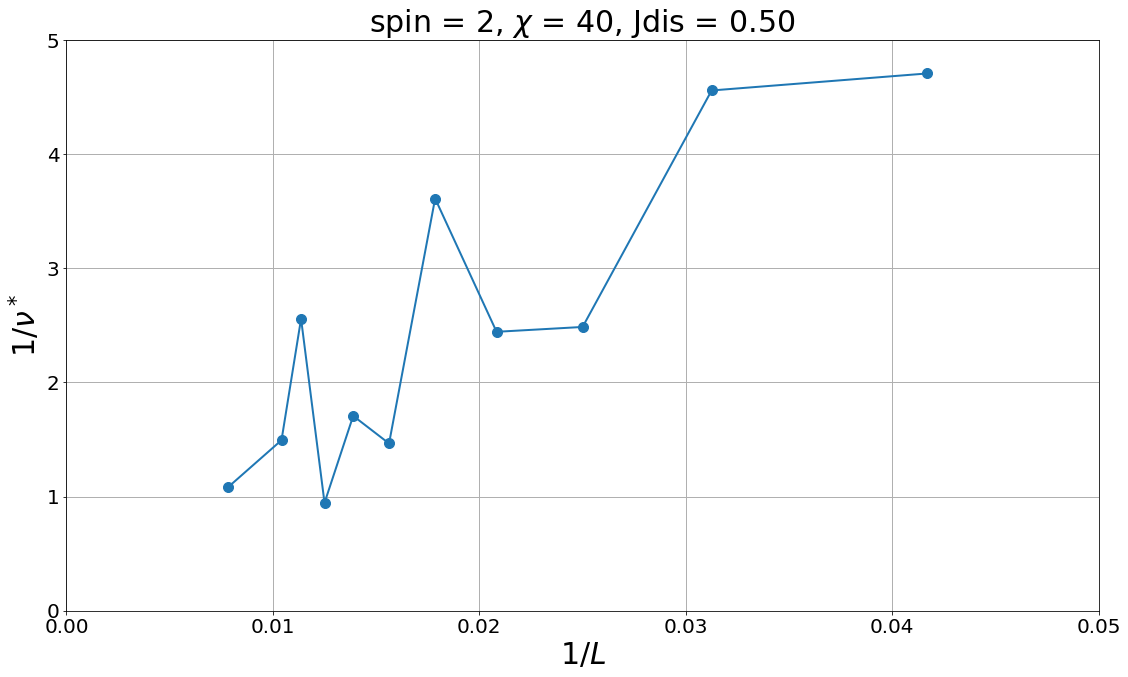

In [20]:
OrderPara = "ZL"

if (OrderPara == "SOP"):
    Para = "O^z"
    plt.ylabel(r'$O^z(r=L/2)$_diff', fontsize=font_size)
if (OrderPara == "ZL"):
    Para = "ZL"
    plt.ylabel(r'$ZL$_diff', fontsize=font_size)

Ls = [24,32,40,48,56,64,72,80,88,96,128,256]
# Ls = [24,32,40,48,56,64]
Jdis = ["Jdis050"]
Dimer = ALL_Dimer[40:66]
n_point = 4
eta = 1

for j in range(len(Jdis)):
    jdis = Jdis[j]
    J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
    S_L1 = []
    S_L2 = []

    for l in range(len(Ls)-1):
        L1 = Ls[l]
        L2 = Ls[l+1]
        f_L1 = pd.DataFrame(columns = ['Dimer', 'ZL'])
        f_L2 = pd.DataFrame(columns = ['Dimer', 'ZL'])
        f_diff = pd.DataFrame(columns = ['Dimer', 'diff'])
        ignore_num = 0

        for d in range(len(Dimer)):
            dimer = Dimer[d]
            D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])
        
            file_L1 = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L1) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'
            file_L2 = my_metadata_file + OrderPara +'/'+ jdis +'/'+ dimer +'/PBC_L'+ str(L2) +'_P'+ str(P) +'_m'+ str(M) +'_'+ OrderPara +'.csv'
            
            if (os.path.exists(file_L1) == False or os.path.exists(file_L2) == False): # Some data is not ok, so we need to ignore it.
                ignore_num += 1
                continue
        
            df_L1 = pd.read_csv(file_L1)
            df_L2 = pd.read_csv(file_L2)

            if (OrderPara == "SOP"):
                mean_L1 = {'Dimer':D, 'ZL':-df_L1[Para][0]}
                mean_L2 = {'Dimer':D, 'ZL':-df_L2[Para][0]}
                mean_diff = {'Dimer':D, 'diff':df_L1[Para][0]-df_L2[Para][0]}
            else:
                mean_L1 = {'Dimer':D, 'ZL':df_L1[Para][0]}
                mean_L2 = {'Dimer':D, 'ZL':df_L2[Para][0]}
                mean_diff = {'Dimer':D, 'diff':df_L2[Para][0]-df_L1[Para][0]}

            f_L1.loc[d-ignore_num] = mean_L1
            f_L2.loc[d-ignore_num] = mean_L2
            f_diff.loc[d-ignore_num] = mean_diff

        ids = find_id(f_diff)
        S1, S2 = fitting_point_slope(f_L1, f_L2, ids, "Dimer", Para, n_point)
        S_L1.append(S1)
        S_L2.append(S2)
        
    print(S_L1, S_L2)

    x = []
    y = []

    for l in range(len(S_L1)):
        x.append(Ls[l]**-eta)
        y.append(np.log(S_L1[l]/S_L2[l]) / np.log(Ls[l]/Ls[l+1]))
        
    print(x)
    print(y)
    plt.plot(x, y, "o-", markersize = font_size/3, linewidth = font_size/15)
    # a, b  = np.polyfit(x, y, 1)

    # fit_x = x.copy()
    # fit_x.append(0)
    # fit_y = [i * a + b for i in fit_x]
    # print(b)
    # plt.plot(fit_x, fit_y, "--", markersize = font_size/3, linewidth = font_size/15)

# plt.xscale('log')
# plt.yscale('log')
plt.xticks(fontsize=font_size/1.5)
plt.yticks(fontsize=font_size/1.5)
plt.ylabel(r'$1/\nu^*$', fontsize=font_size)
plt.xlabel(r'$1/L$', fontsize=font_size)
plt.xlim(0, 0.05)
plt.ylim(0, 5)
plt.grid(linestyle='-', linewidth=1)
plt.title('spin = %s, $\chi$ = %d, Jdis = %.2f' % (spin, M, J), fontsize=font_size)
# plt.legend(bbox_to_anchor=(1, 1), loc = 'best',fontsize=font_size*5/6)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()